In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [173]:
file_path = 'train_results/left_turn/value_penalty/Best_result/training_log.csv'

In [167]:
file_path1 = 'train_results/left_turn/sac/sac_result/training_log.csv'

In [207]:
file_path2 = 'train_results/left_turn/value_penalty/chawre1/training_log.csv'

In [208]:
data = pd.read_csv(file_path, header=None)
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

In [209]:
data2.head()

,episode,step,episodic reward,success rate,episodic length
0,0,5,-1,0.0,5
1,0,10,-1,0.0,10
2,0,15,-1,0.0,15
3,0,20,-1,0.0,20
4,0,25,-1,0.0,25


In [175]:
data.head()

,0,1,2,3,4
0,0,5,-1,0.0,5
1,0,10,-1,0.0,10
2,0,15,-1,0.0,15
3,0,20,-1,0.0,20
4,0,25,-1,0.0,25


In [180]:
x_sac = data1['step'].array
y_sac = data1['success rate'].array

In [181]:
x_vp = data[1].array[:20000]
y_vp = data[3].array[:20000]

In [213]:
x_vp1 = data2['step'].array[:20000]
y_vp1 = data2['success rate'].array[:20000]

In [220]:
window = 200
x_sac_filt = np.convolve(x_sac, np.ones(window)/window, mode='valid')
y_sac_filt = np.convolve(y_sac, np.ones(window)/window, mode='valid')

x_vp_filt = np.convolve(x_vp, np.ones(window)/window, mode='valid')
y_vp_filt = np.convolve(y_vp, np.ones(window)/window, mode='valid')

x_vp1_filt = np.convolve(x_vp1, np.ones(window)/window, mode='valid')
y_vp1_filt = np.convolve(y_vp1, np.ones(window)/window, mode='valid')

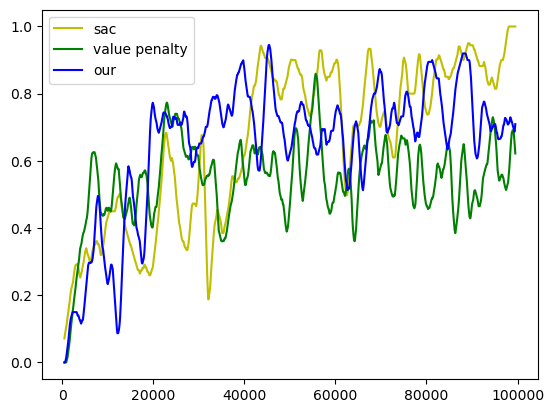

In [221]:
plt.plot(x_sac_filt, y_sac_filt, color='y', label='sac')
plt.plot(x_vp1_filt, y_vp1_filt, color='g', label='value penalty')
plt.plot(x_vp_filt, y_vp_filt, color='b', label='our')
plt.legend()
plt.show()

sac
    success rate: 64.0%
    time: mean=11.81, std=1.02
vp
    success rate: 82.0%
    time: mean=11.06, std=1.93
our
    success rate: 96.0%
    time: mean=12.12, std=2.10

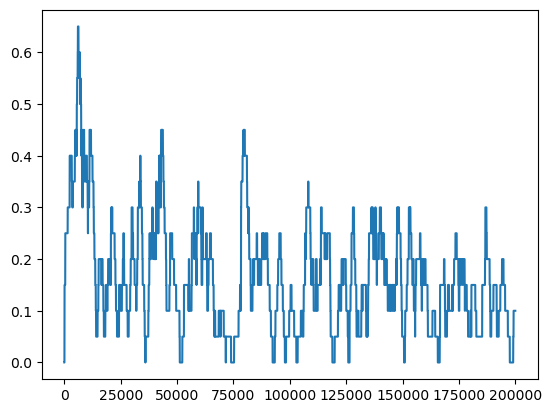

In [154]:
plt.plot(data[1].array, data[5].array)
plt.show()

In [57]:
window = 2000
smoot_y = np.convolve(data[3], np.ones(window)/window, mode='valid')
smoot_x = np.convolve(data[1], np.ones(window)/window, mode='valid')

In [136]:
test_path = 'test_results/left_turn/value_penalty/test_log.csv'

In [140]:
test_data = pd.read_csv(test_path)

In [141]:
test_data.head()

,No.,success,collision,return,length
0,1,False,[Collision(collidee_id='car_type_4-flow-route-...,-1.0,75
1,2,True,[],1.0,114
2,3,True,[],1.0,104
3,4,True,[],1.0,103
4,5,True,[],1.0,108


In [128]:
np.argwhere(test_data['return'].array == 0.0)

array([[14],
       [17]])

In [129]:
np.argwhere(test_data['success'].array == False)

array([[ 2],
       [ 5],
       [ 7],
       [ 9],
       [12],
       [14],
       [15],
       [17],
       [18],
       [19],
       [20],
       [25],
       [26],
       [30],
       [39]])

In [130]:
index = 2

In [131]:
speed_str = test_data['speed'][index]
speed_str = speed_str.replace('[', '')
speed_str = speed_str.replace(']', '')
speed_list = []
for i in speed_str.split(', '):
    speed_list.append(float(i))


In [132]:
head_str = test_data['heading'][index]
head_str = head_str.replace('[', '')
head_str = head_str.replace(']', '')
head_list = []
for i in head_str.split(', '):
    head_list.append(float(i))

In [133]:
iter = [i for i in range(test_data['length'][index])]

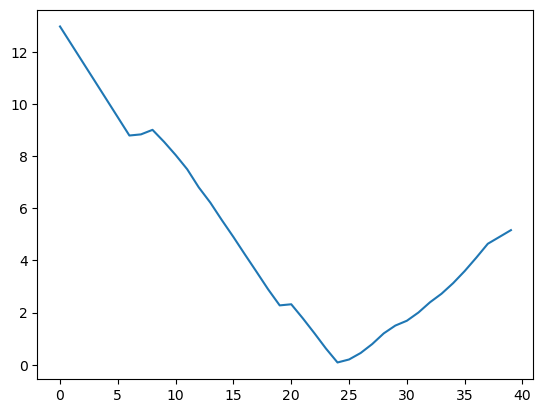

In [134]:
plt.plot(iter, speed_list)
plt.show()

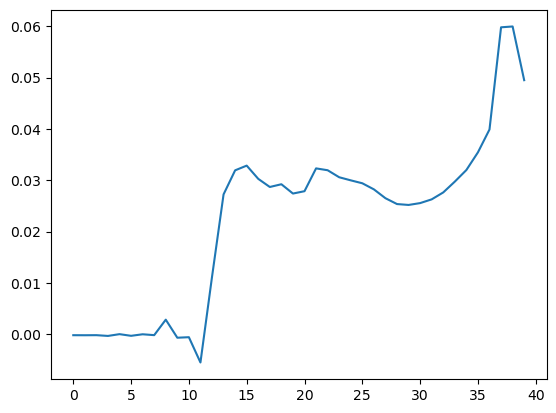

In [135]:
plt.plot(iter, head_list)
plt.show()